# Project Analysis



In [22]:
## headers
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import date

from matplotlib import pyplot as plt

In [2]:
##testing add

## Ryan adding to branch ryan

Superstore = pd.read_csv("Superstore.csv")
ss = Superstore

# Data Preparation

In [3]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:


ss["Pcnt Profit"] = 100*ss["Profit"].divide(ss["Sales"]-ss["Profit"])
ss.loc[ss["Profit"]>0,"Pcnt Profit"] = 100*ss["Profit"].divide(ss["Sales"])

## to eplain this first, getting indexes of each slash then uging that to slice
ss['Opos1'] = ss.apply(lambda x: x["Order Date"].find('/', 0), axis=1)
ss['Opos2'] = ss.apply(lambda x: x["Order Date"].find('/', x["Opos1"]+1), axis=1)

ss["OrderMonth"] = ss.apply(lambda x: int(x["Order Date"][0:x["Opos1"]]), axis=1)
ss["OrderDay"] = ss.apply(lambda x: int(x["Order Date"][x["Opos1"]+1:x["Opos2"]]), axis=1)
ss["OrderYear"] = ss.apply(lambda x: int(x["Order Date"][x["Opos2"]+1:]), axis=1)
ss["OrderDateObj"] = ss.apply(lambda x: date(x["OrderYear"], x["OrderMonth"], x["OrderDay"]), axis=1)

ss['Spos1'] = ss.apply(lambda x: x["Ship Date"].find('/', 0), axis=1)
ss['Spos2'] = ss.apply(lambda x: x["Ship Date"].find('/', x["Spos1"]+1), axis=1)

ss["ShipMonth"] = ss.apply(lambda x: int(x["Ship Date"][0:x["Spos1"]]), axis=1)
ss["ShipDay"] = ss.apply(lambda x: int(x["Ship Date"][x["Spos1"]+1:x["Spos2"]]), axis=1)
ss["ShipYear"] = ss.apply(lambda x: int(x["Ship Date"][x["Spos2"]+1:]), axis=1)
ss["ShipDateObj"] = ss.apply(lambda x: date(x["ShipYear"], x["ShipMonth"], x["ShipDay"]), axis=1)



ss["DaysToShip"] = ss.apply(lambda x: (x["ShipDateObj"] - x["OrderDateObj"]).days, axis=1)
#ok, so by using a time and date library i dont have to worry about leap days or any of that 
ss

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,OrderDay,OrderYear,OrderDateObj,Spos1,Spos2,ShipMonth,ShipDay,ShipYear,ShipDateObj,DaysToShip
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,2016,2016-11-08,2,5,11,11,2016,2016-11-11,3
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,2016,2016-11-08,2,5,11,11,2016,2016-11-11,3
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,12,2016,2016-06-12,1,4,6,16,2016,2016-06-16,4
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,2015,2015-10-11,2,5,10,18,2015,2015-10-18,7
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,2015,2015-10-11,2,5,10,18,2015,2015-10-18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,21,2014,2014-01-21,1,4,1,23,2014,2014-01-23,2
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5


In [5]:
ss = Superstore
wh = pd.DataFrame()
ss_grouped = ss.groupby(["OrderYear","OrderMonth","Region","State","Ship Mode","Segment","Category","Sub-Category"])
wh["total_sales"] = ss_grouped["Row ID"].count()
wh["sold_items"] = ss_grouped["Quantity"].sum()
wh["total_revenue"] = ss_grouped["Sales"].sum()
wh["total_profit"] = ss_grouped["Profit"].sum()
wh

total_sales  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category                
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders                 1   
                                                                                   Labels                  1   
                                                                                   Storage                 1   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners               1   
                             Michigan   Standard Class Consumer    Furniture       Furnishings             2   
...                                                                                                      ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage                 1   
                                                       Corporate   Furniture       Furnishings             2   
                                                                   Office Supplies Binders                 2   
                                                                                   Storage                 1   
                                                       Home Office Furniture       Furnishings             1   

                                                                                                 sold_items  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category               
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders                2   
                                                                                   Labels                 3   
                                                                                   Storage                3   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners              3   
                             Michigan   Standard Class Consumer    Furniture       Furnishings            6   
...                                                                                                     ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage                6   
                                                       Corporate   Furniture       Furnishings           14   
                                                                   Office Supplies Binders                6   
                                                                                   Storage                4   
                                                       Home Office Furniture       Furnishings            3   

                                                                                                 total_revenue  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category                  
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders               3.540   
                                                                                   Labels               11.784   
                                                                                   Storage             272.736   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners             5.940   
                             Michigan   Standard Class Consumer    Furniture       Furnishings         287.670   
...                                                                                                        ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage            1003.620   
                                                       Corporate   Furniture       Furnishings          78.080   
                                                        

**Question 1.** Analyze the sales by category by year. Are the sales in each
category improving year-after-year? What are the categories of products
with the best improvement in sales? What are the categories of products
that lagged?

In [17]:
q1 = wh.groupby(["Category","OrderYear"]).sum().reset_index()
q1

,Category,OrderYear,total_sales,sold_items,total_revenue,total_profit
0,Furniture,2014,421,1623,157192.8531,5457.7255
1,Furniture,2015,452,1775,170518.2370,3015.2029
2,Furniture,2016,562,2193,198901.4360,6959.9531
3,Furniture,2017,686,2437,215387.2692,3018.3913
4,Office Supplies,2014,1217,4569,151776.4120,22593.4161
5,Office Supplies,2015,1241,4715,137233.4630,25099.5338
6,Office Supplies,2016,1566,5946,183939.9820,35061.2292
7,Office Supplies,2017,2002,7676,246097.1750,39736.6217
8,Technology,2014,355,1389,175278.2330,21492.8325
9,Technology,2015,409,1489,162780.8090,33503.8670


Text(0.5, 1.0, 'Totals Sales Over Time by Category')

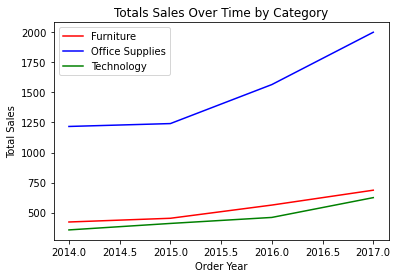

In [34]:
plt.figure()
plt.title
plt.plot(q1[q1.Category=="Furniture"].OrderYear, q1[q1.Category=="Furniture"].total_sales, color="red",label="Furniture")
plt.plot(q1[q1.Category=="Office Supplies"].OrderYear, q1[q1.Category=="Office Supplies"].total_sales,color="blue",label="Office Supplies")
plt.plot(q1[q1.Category=="Technology"].OrderYear, q1[q1.Category=="Technology"].total_sales, color="green",label="Technology")
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Totals Sales Over Time by Category")

Each sales category is indeed increasing in sales over each year. Office supplies appear to have the steepest increase in sales over time, while Furniture and Technology seem to equally increase a little bit over the years.